Compare with analytical solution (sedov_100 seems to have t~8e-5)

In [9]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt
import Utilities.prelude
from Utilities.time_extractor import days_since_distruption

In [10]:
E = 0.1
den0 = 1

In [11]:
def analytic_sol(t):
    rv = t * 5/2 
    return rv

def xi_shock(r_known, t_known):
    xi = r_known * (den0/(E * t_known**2))**(1/5)
    return xi

def rsh_expected(xi,t):
    rsh = xi*(E*t**2/den0)**(1/5)
    return rsh

In [12]:
shock_surface100 = np.loadtxt('data/100/shocksurface_100.txt')
xshock100 = shock_surface100[0]
yshock100 = shock_surface100[1]
zshock100 = shock_surface100[2]
rshock100 = np.sqrt(xshock100**2 + yshock100**2 + zshock100**2)
R100 = np.mean(rshock100)
t100, _ = days_since_distruption('sedov/100/sedov_100.h5')
t100 = t100[0]
xi = xi_shock(R100, t100)

shock_surfacefinal = np.loadtxt('data/final/shocksurface_final.txt')
xshockfinal = shock_surfacefinal[0]
yshockfinal = shock_surfacefinal[1]
zshockfinal = shock_surfacefinal[2]
rshockfinal = np.sqrt(xshockfinal**2 + yshockfinal**2 + zshockfinal**2)
Rfinal = np.mean(rshockfinal)
tfinal, _ = days_since_distruption('sedov/final/sedov_final.h5')
tfinal = tfinal[0]

rfinal_expected = rsh_expected(xi, tfinal)

vshockmiddle = (Rfinal - R100) / (tfinal - t100)
ratiomiddle = Rfinal/vshockmiddle #I should have Rmiddle
tmiddle = tfinal # should be tmiddle, as(tfinal + t100)/2


time = np.arange(0, tfinal+0.03, 0.001)
analytic = analytic_sol(time)

In [31]:
print(100*(rfinal_expected-Rfinal)/Rfinal, '%')

0.7058311357662858 %


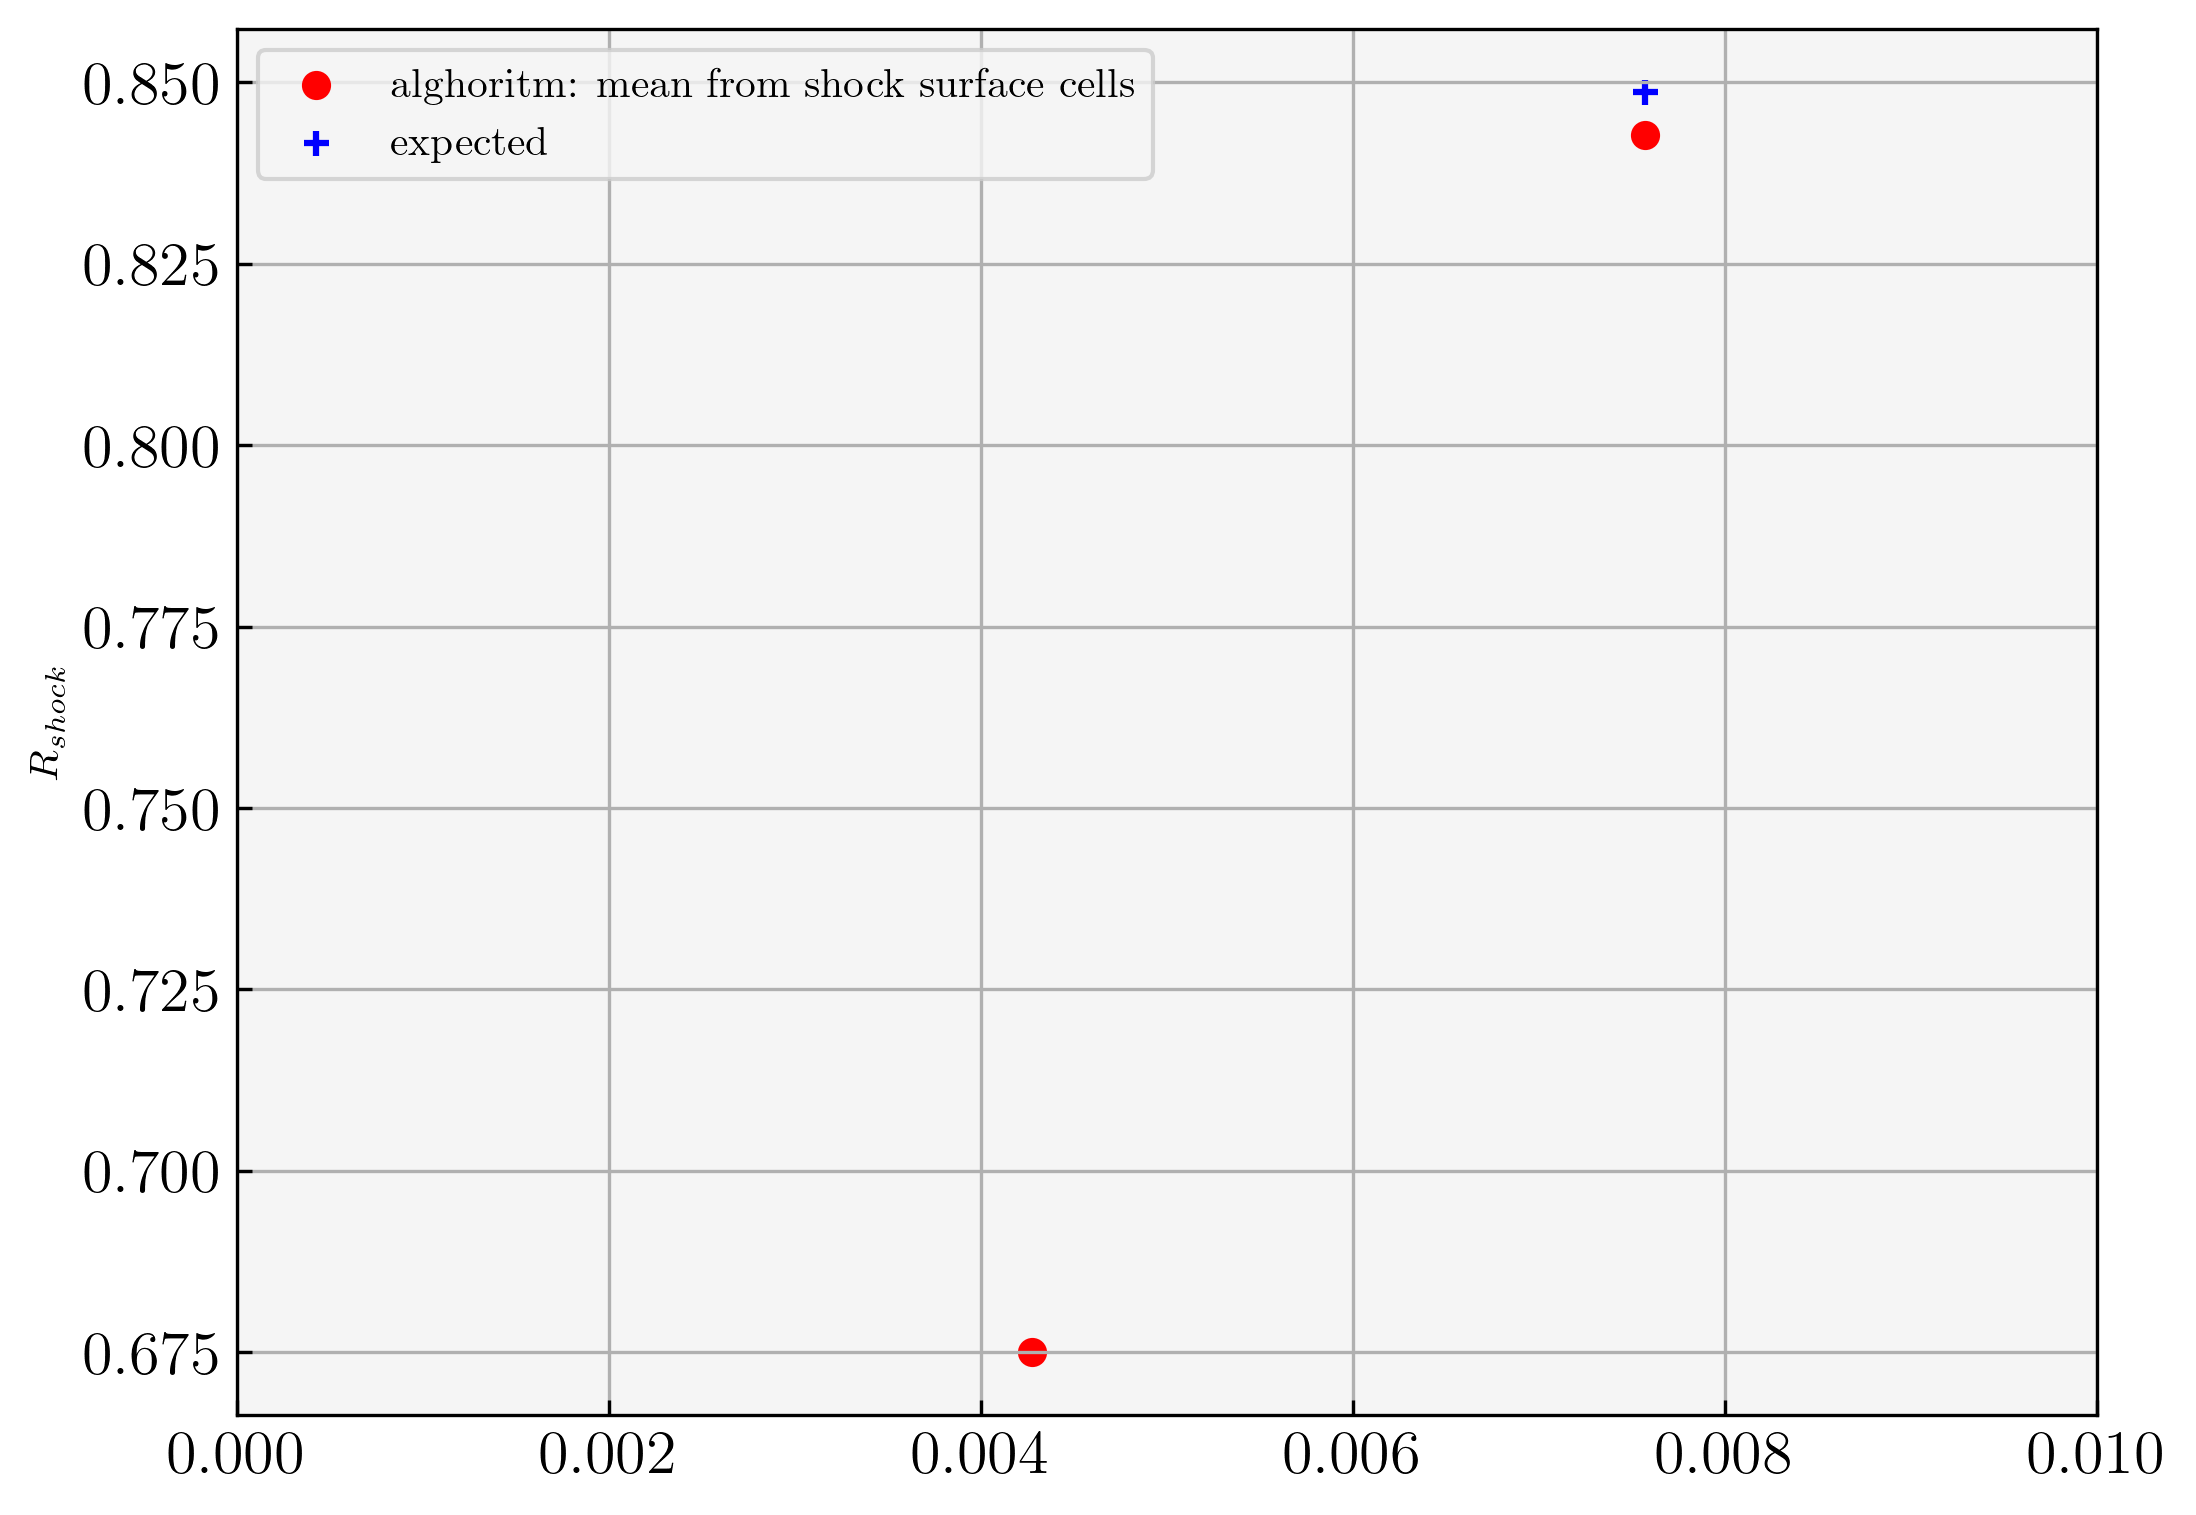

In [26]:
plt.scatter([t100, tfinal], [R100, Rfinal], c = 'r', label = r'alghoritm: mean from shock surface cells')
plt.xlim(0,0.01)
plt.scatter(tfinal, rfinal_expected, marker = '+', c = 'b', label = 'expected')
plt.ylabel(r'$R_{shock}$')
plt.legend()
plt.grid()

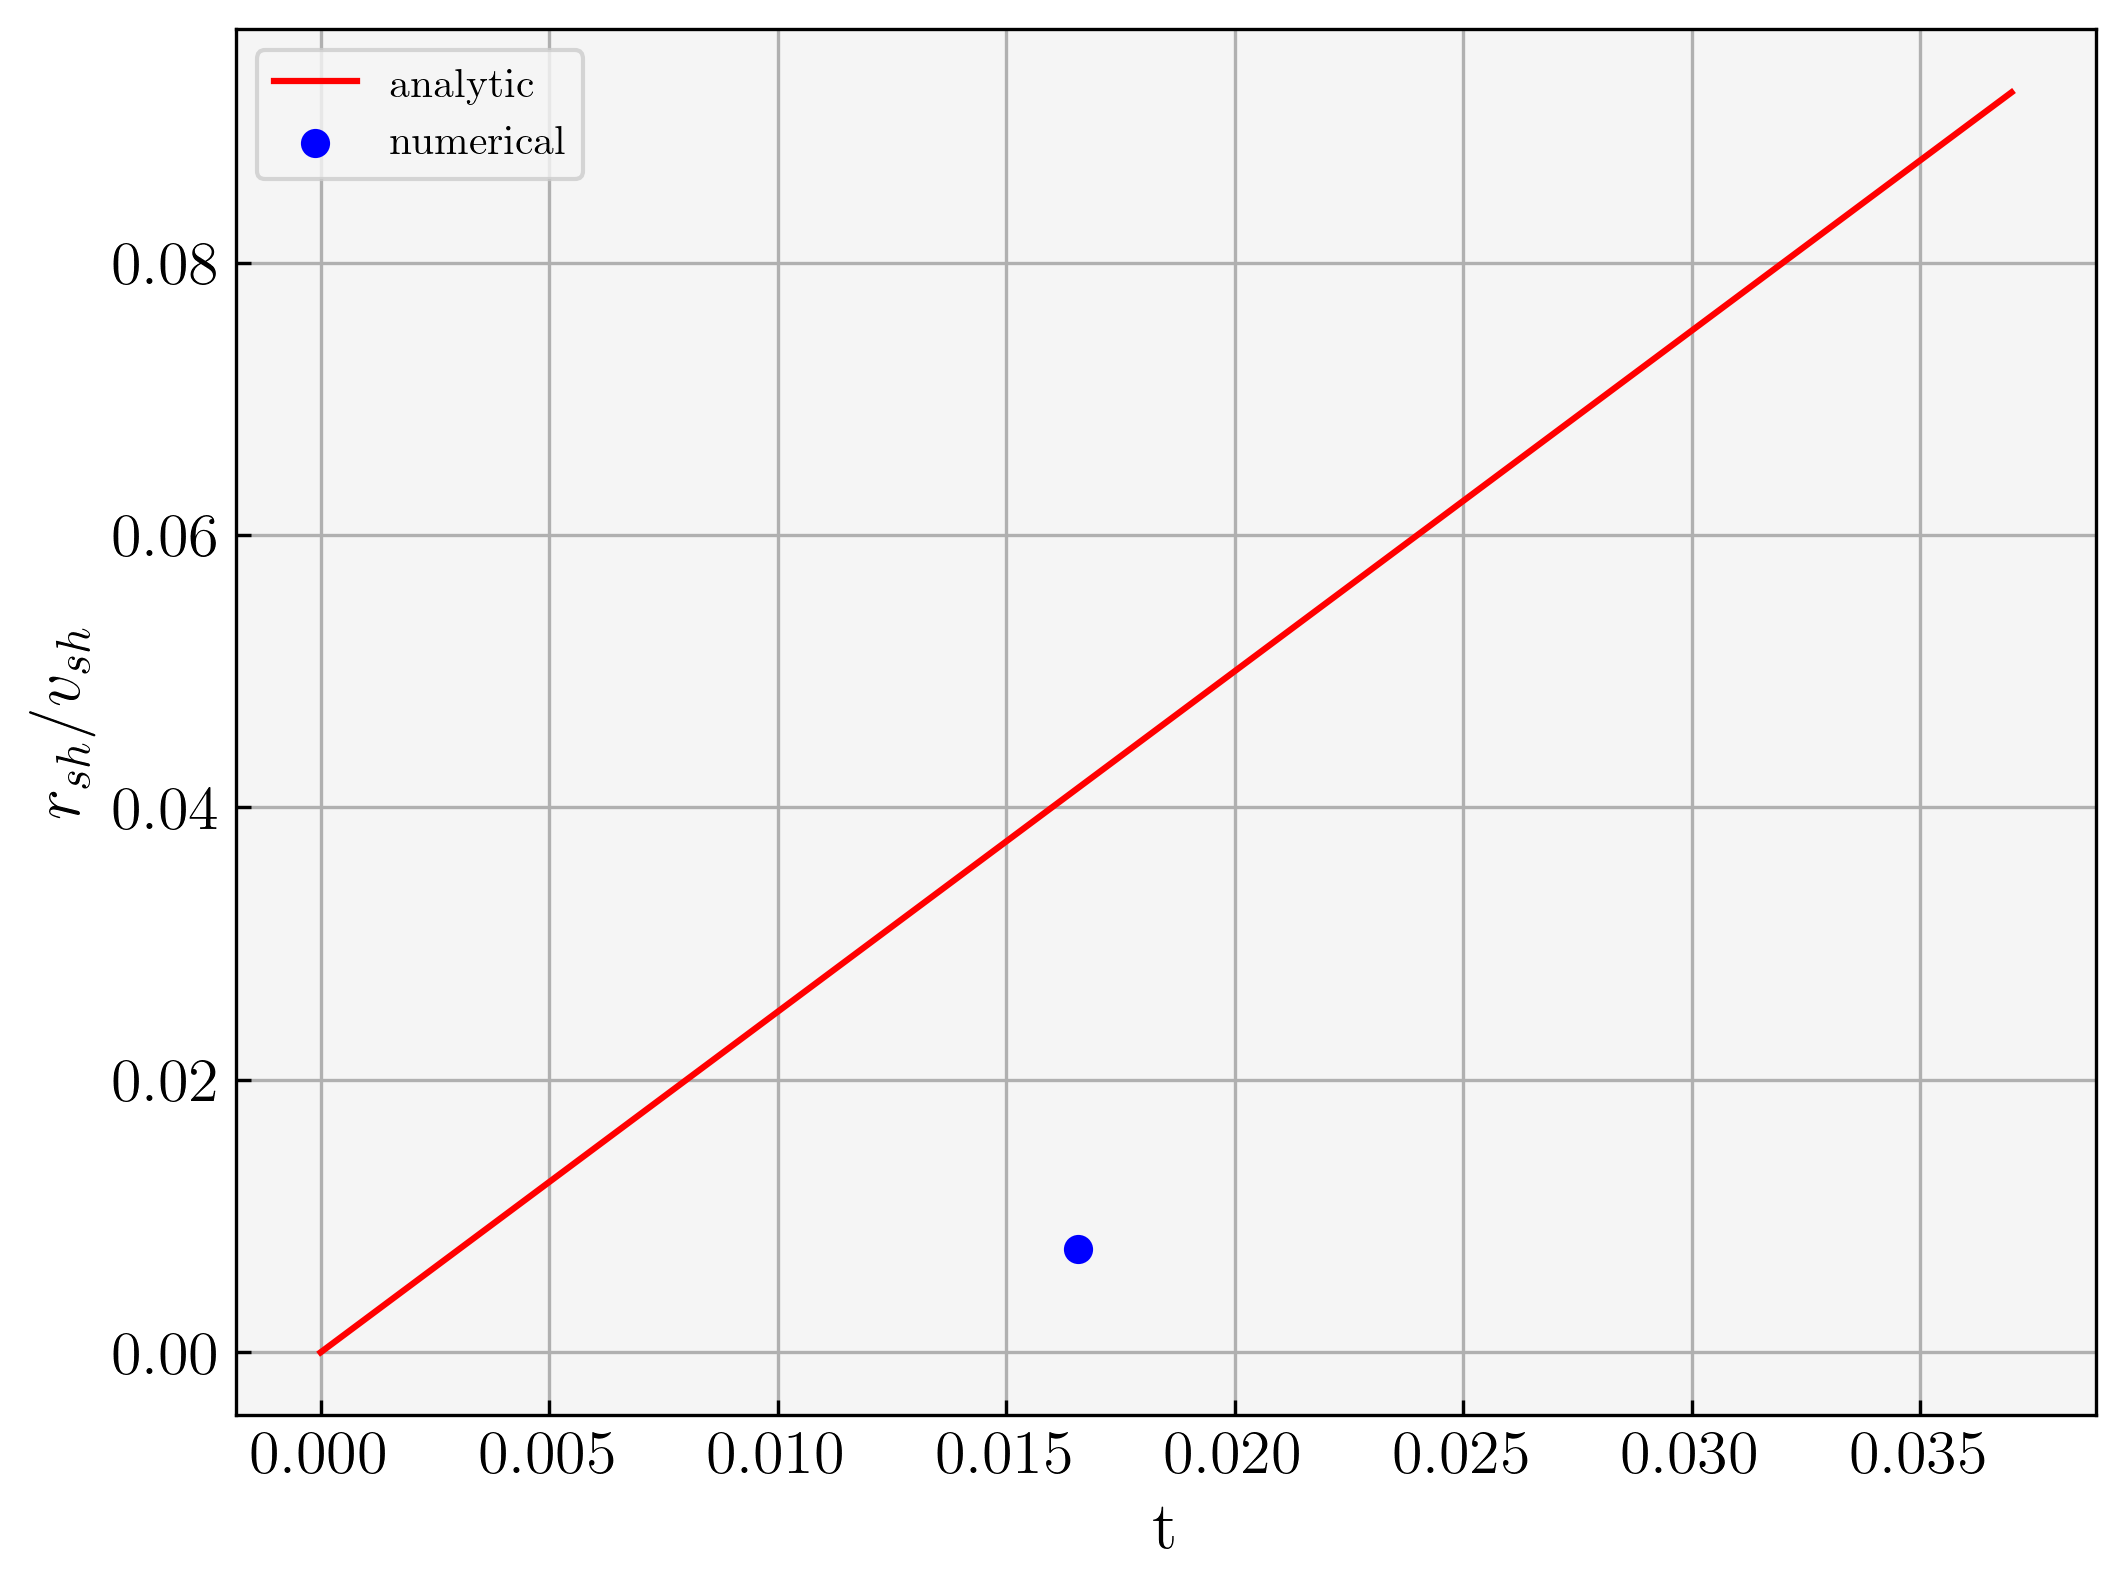

In [32]:
plt.plot(time, analytic, color = 'r', label = 'analytic')
plt.scatter(ratiomiddle,tmiddle, c = 'b', label = 'numerical')
plt.xlabel('t', fontsize = 16)
plt.ylabel(r'$r_{sh}/v_{sh}$', fontsize = 16)
plt.legend()
plt.grid()